In [23]:
from DSClustering import DSClustering
from sklearn.datasets import load_wine, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import pandas as pd

In [24]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agglomerative = AgglomerativeClustering(n_clusters=3)
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clustering = DSClustering(X, n_clusters=3, clusters_algorithms=[kmeans, agglomerative, spectral])
clustering.compute_clusters()
clustering.compare_clusters()
clustering.normalize_clusters()
print("Normalized Clusters:")
clustering.compare_clusters()

Contingency Table between 'KMeans' and 'AgglomerativeClustering':
AgglomerativeClustering   0   1   2
KMeans                             
0                        61   0   0
1                         0  50   0
2                         3   0  36

Contingency Table between 'KMeans' and 'SpectralClustering':
SpectralClustering   0   1   2
KMeans                        
0                    0  61   0
1                   50   0   0
2                    0   3  36

Contingency Table between 'AgglomerativeClustering' and 'SpectralClustering':
SpectralClustering        0   1   2
AgglomerativeClustering            
0                         0  63   1
1                        50   0   0
2                         0   1  35

Normalized Clusters:
Contingency Table between 'KMeans' and 'AgglomerativeClustering':
AgglomerativeClustering   0   1   2
KMeans                             
0                        61   0   0
1                         0  50   0
2                         3   0  36

Contingen

/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [25]:
labels = clustering.fit_dsc(threshold=0.5)

Number of elements in each cluster:
Cluster 0: 189 elements
Cluster 1: 150 elements
Cluster 2: 111 elements
Optimization started
Processing epoch	923	0.0092	
Training time: 68.30s, epochs: 923

Least training loss reached: 0.009


Most important rules for class 0

	[0.950] R10: 3.758 < petal length (cm) < 4.945
			0: 0.950	1: 0.000	2: 0.000	Unc: 0.050

	[0.935] R2: 5.843 < sepal length (cm) < 6.400
			0: 0.934	1: 0.002	2: 0.000	Unc: 0.065

	[0.906] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.827	1: 0.167	2: 0.000	Unc: 0.006

	[0.904] R4: sepal width (cm) < 2.764
			0: 0.851	1: 0.109	2: 0.000	Unc: 0.039

	[0.845] R9: 2.571 < petal length (cm) < 3.758
			0: 0.845	1: 0.000	2: 0.000	Unc: 0.155

	[0.842] R14: 1.199 < petal width (cm) < 1.712
			0: 0.842	1: 0.000	2: 0.000	Unc: 0.158

	[0.826] R13: 0.687 < petal width (cm) < 1.199
			0: 0.826	1: 0.000	2: 0.000	Unc: 0.174

	[0.735] R5: 2.764 < sepal width (cm) < 3.057
			0: 0.654	1: 0.172	2: 0.000	Unc: 0.174

	[0.571] R15: petal width (cm) >

In [26]:
#calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")
#comparamos con silhouette score de kmeans
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette_avg}")
#comparamos con silhouette score de agglomerative
agglomerative_labels = agglomerative.fit_predict(X)
agglomerative_silhouette_avg = silhouette_score(X, agglomerative_labels)
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette_avg}")
#comparamos con silhouette score de spectral
spectral_labels = spectral.fit_predict(X)
spectral_silhouette_avg = silhouette_score(X, spectral_labels)
print(f"Spectral Silhouette Score: {spectral_silhouette_avg}")

Silhouette Score: 0.5496012930724506
KMeans Silhouette Score: 0.5528190123564095
Agglomerative Silhouette Score: 0.5543236611296419
Spectral Silhouette Score: 0.5541608580282851


/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


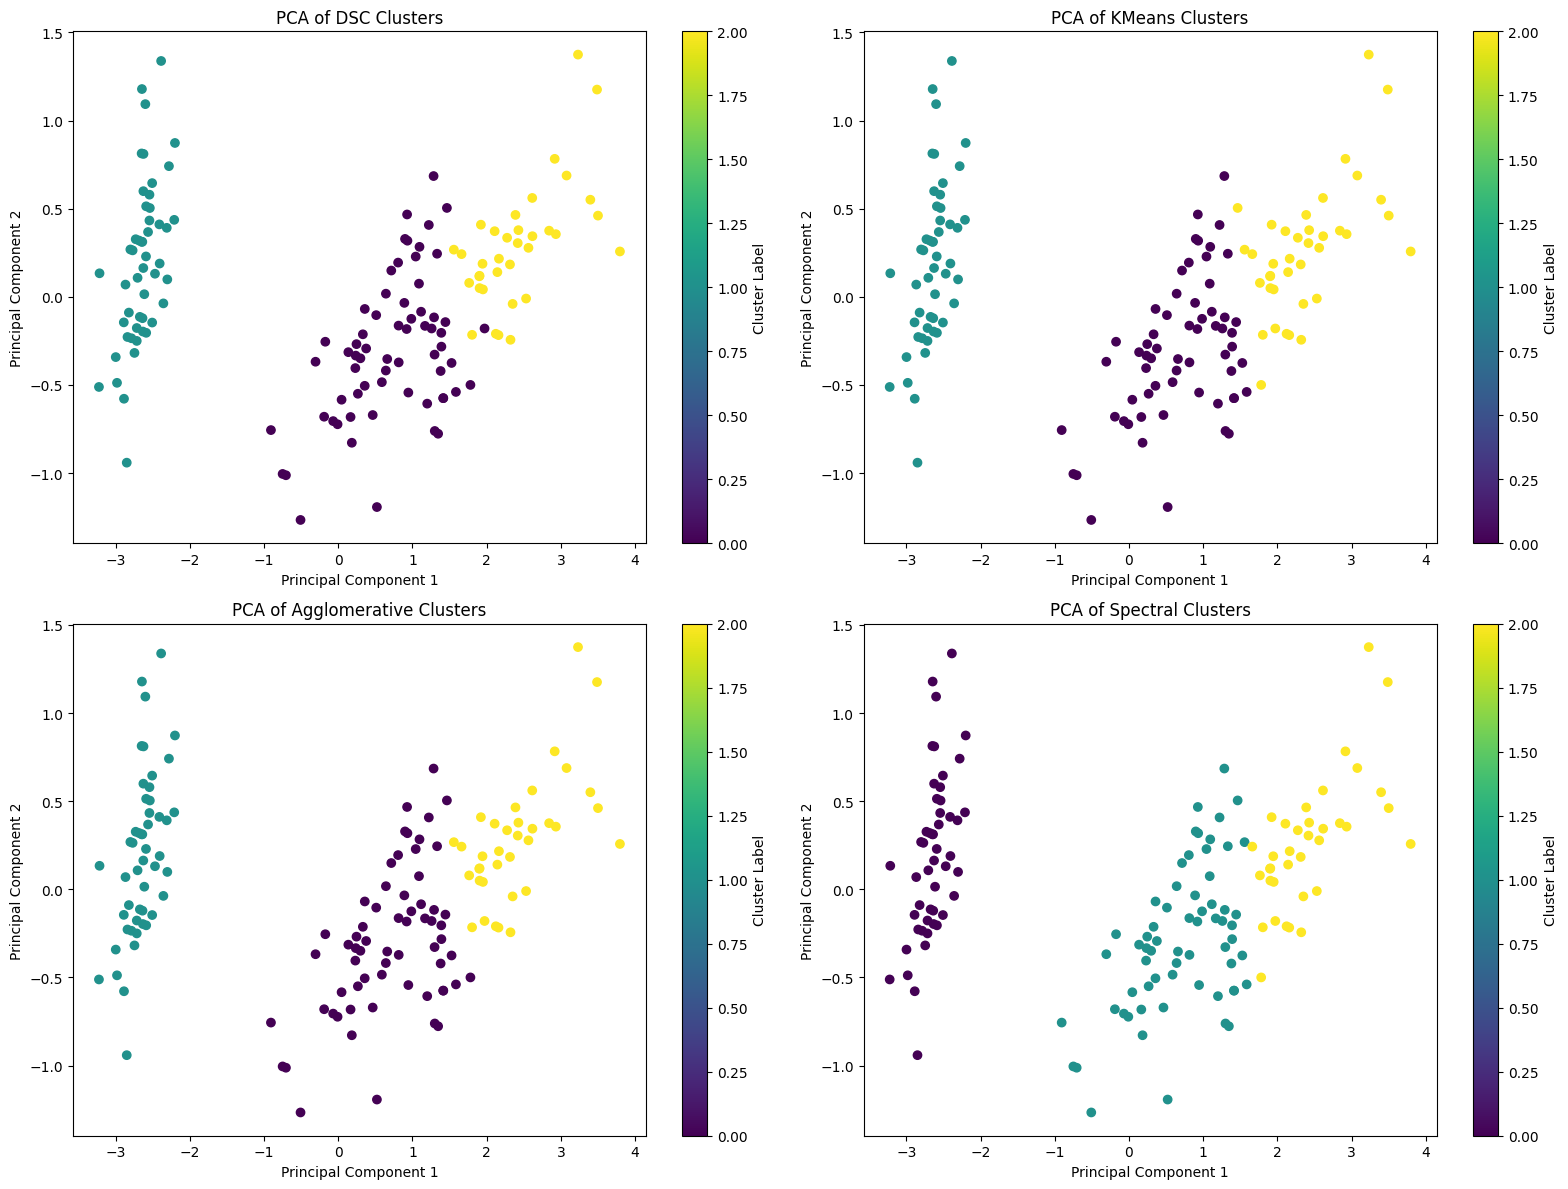

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plotting the PCA results

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# DSC Clusters
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
axs[0, 0].set_title('PCA of DSC Clusters')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar.set_label('Cluster Label')

# KMeans Clusters
axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0, 1].set_title('PCA of KMeans Clusters')
axs[0, 1].set_xlabel('Principal Component 1')
axs[0, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar.set_label('Cluster Label')

# Agglomerative Clusters
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis')
axs[1, 0].set_title('PCA of Agglomerative Clusters')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar.set_label('Cluster Label')

# Spectral Clusters
axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis')
axs[1, 1].set_title('PCA of Spectral Clusters')
axs[1, 1].set_xlabel('Principal Component 1')
axs[1, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar.set_label('Cluster Label')

plt.tight_layout()
plt.show()
